<a href="https://colab.research.google.com/github/qdo1010/NE204examples/blob/main/Assignment05_Week06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Questions 1-10 do not require Python

In [ ]:
# Necessary packages

import matplotlib.pyplot as plt
import numpy as np


## Code for Questions 11 onward

The basic Hodgkin-Huxley model code is below. We will solve the system multiple times, so paste the necessary code in the cells under each question.

We only need to paste the code cells that involve running and plotting.

In [ ]:
# The HH model and a plotting function

# Average potassium channel conductance per unit area (mS/cm^2)
gK = 36.0

# Average sodium channel conductance per unit area (mS/cm^2)
gNa = 120.0

# Average leak channel conductance per unit area (mS/cm^2)
gL = 0.3

# Membrane capacitance per unit area (uF/cm^2)
Cm = 1.0

# Potassium potential (mV)
VK = -77.0

# Sodium potential (mV)
VNa = 50.0

# Leak potential (mV)
Vl = -54.4


# Potassium ion-channel rate functions

def alpha_n(Vm):
    return (0.01 * (55.0 + Vm)) / (1-np.exp(- (55.0 + Vm)/10))

def beta_n(Vm):
    return 0.0555 * np.exp(-Vm / 80.0)

# Sodium ion-channel rate functions

def alpha_m(Vm):
    return (0.1 * (40.0 + Vm)) / (1-np.exp(-(40 + Vm)/10))

def beta_m(Vm):
    return 0.108 * np.exp(-Vm / 18.0)

def alpha_h(Vm):
    return 0.0027 * np.exp(-Vm / 20.0)

def beta_h(Vm):
    return 1.0 / (1 + np.exp(- (35.0 + Vm)/10))

# n, m, and h steady-state values

def tau(a,b,V):
  return 1/(a(V) + b(V))

def xinf(a,b,V):
  return a(V)/(a(V) + b(V))

n_inf = lambda Vm: xinf(alpha_n,beta_n,Vm)
m_inf = lambda Vm: xinf(alpha_m,beta_m,Vm)
h_inf = lambda Vm: xinf(alpha_h,beta_h,Vm)

tau_n = lambda Vm: tau(alpha_n,beta_n,Vm)
tau_m = lambda Vm: tau(alpha_m,beta_m,Vm)
tau_h = lambda Vm: tau(alpha_h,beta_h,Vm)

def compute_derivatives(y, inp):
    dy = np.zeros((4,))

    Vm = y[0]
    n = y[1]
    m = y[2]
    h = y[3]

    # dVm/dt
    GK = (gK / Cm) * np.power(n, 4.0)
    GNa = (gNa / Cm) * np.power(m, 3.0) * h
    GL = gL / Cm

    dy[0] = (inp / Cm) - (GK * (Vm - VK)) - (GNa * (Vm - VNa)) - (GL * (Vm - Vl))

    # dn/dt
    dy[1] = (alpha_n(Vm) * (1.0 - n)) - (beta_n(Vm) * n)

    # dm/dt
    dy[2] = (alpha_m(Vm) * (1.0 - m)) - (beta_m(Vm) * m)

    # dh/dt
    dy[3] = (alpha_h(Vm) * (1.0 - h)) - (beta_h(Vm) * h)

    return dy


def eulersolve(y,dy,timespan,inp):
  dt = timespan[1]-timespan[0]
  i = 0
  solution = np.zeros((len(timespan),len(y)))
  solution[0] = y
  for t in timespan:
    y = y + dy(y,inp[i])*dt
    solution[i] = y
    i = i+1


  return solution


## all the plots we might need
def plotall(solution):
  Vs = solution[:,0]
  ns = solution[:,1]
  ms = solution[:,2]
  hs = solution[:,3]

  INa = gNa  * np.power(ms, 3.0) * hs * (Vs - VNa)
  IK = gK  * np.power(ns, 4.0) * (Vs - VK)
  IL = gL * (Vs - Vl)

  GNa = gNa  * np.power(ms, 3.0) * hs
  GK = gK  * np.power(ns, 4.0)

  fig, axs = plt.subplots(5, 1, gridspec_kw={'height_ratios': [3,3,3,3,1]}, figsize = (6,8))

  axs[0].plot(timespan, Vs)
  axs[0].set_xlabel('Time (ms)')
  axs[0].set_ylabel('Vm (mV)')
  axs[0].set_title('Neural response to stimulus (Voltage) vs Time')

  axs[1].plot(timespan, ms)
  axs[1].plot(timespan, hs)
  axs[1].plot(timespan, ns)
  axs[1].legend(['m','h','n'])
  axs[1].set_xlabel('Time (ms)')
  axs[1].set_title('Gating')

  axs[2].plot(timespan, GNa)
  axs[2].plot(timespan, GK)
  axs[2].legend(['$G_{Na} = g_{Na}m^3h$','$G_K = g_Kn^4$'])
  axs[2].set_xlabel('Time (ms)')

  axs[3].plot(timespan, INa)
  axs[3].plot(timespan, IK)
  axs[3].plot(timespan, IL)
  axs[3].legend(['$I_{Na}$','$I_K$','$I_L$'])
  axs[3].set_xlabel('Time (ms)')
  axs[3].set_ylabel(r'I ($\mu A$)')
  axs[3].set_title('Ionic currents vs Time')

  axs[4].plot(timespan, inp)
  axs[4].set_xlabel('Time (ms)')
  axs[4].set_ylabel(r'I ($\mu A$)')
  axs[4].set_title('Stimulus current vs Time')

  fig.tight_layout()


## Question 11

Match $m_∞(V)$, $h_∞(V)$, and $n_∞(V)$,   to their plotted curves, where the x-axis is membrane potential and the y-axis is probability of gates being open.

Text(0, 0.5, 'Probability of gate being open')

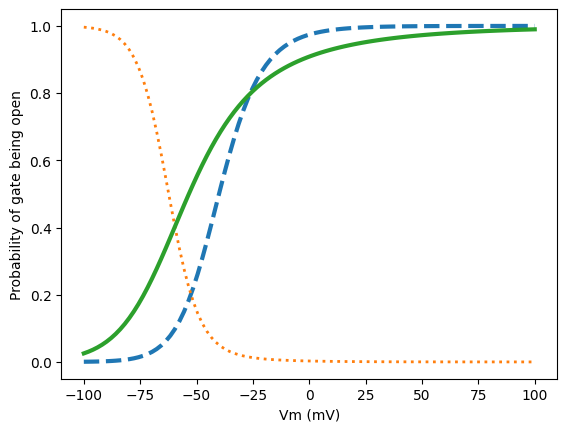

In [ ]:
Vtest = np.linspace(-100,100,100)
plt.plot(Vtest,m_inf(Vtest), linewidth = 3, linestyle = 'dashed')
plt.plot(Vtest,h_inf(Vtest),linewidth = 2, linestyle = 'dotted')
plt.plot(Vtest,n_inf(Vtest),linewidth = 3)
plt.xlabel('Vm (mV)')
plt.ylabel('Probability of gate being open')


## Question 12

Fix I=4 and simulate the HH model for 200 ms.

At this value of input ______. (Be sure to consider the entire 200 ms.)

_Be sure to check that the parameters below reflect what is asked in the question! You may need to change something._

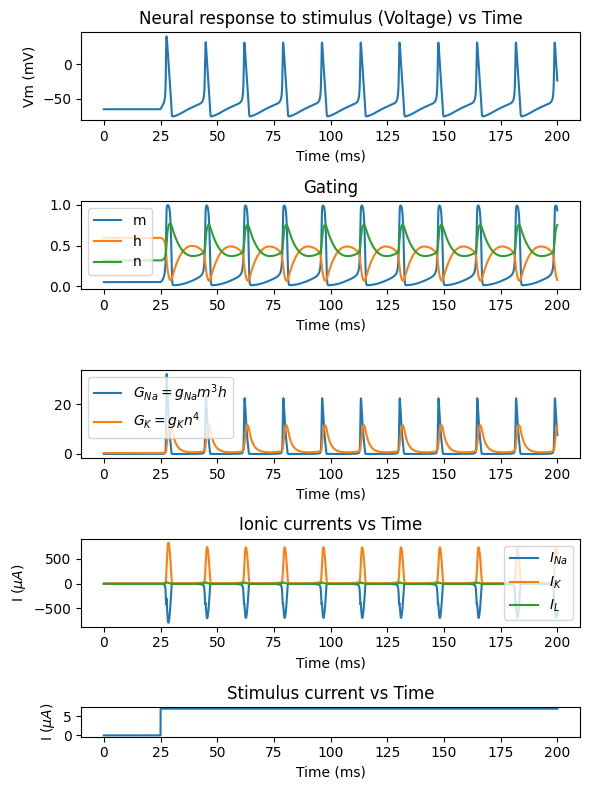

In [ ]:
# Start and end time (in milliseconds)
tmin = 0.0
tmax = 200.0
timespan = np.arange(tmin,tmax,0.01)


# Initial state (Vm, n, m, h)
Y = np.array([-65, n_inf(-65), m_inf(-65), h_inf(-65)])

#Input current
I = 7
inp = np.zeros(len(timespan))
inp[np.where(timespan>25)] = I

solution = eulersolve(Y,compute_derivatives,timespan,inp)
ns = solution[:,1]
ms = solution[:,2]
hs = solution[:,3]

plotall(solution)




## Question 13

Fix I=4 and simulate the HH model for 200 ms. Keep increasing I by 0.5 units until you see steady spiking. What is the approximate minimum current value needed for steady spiking?



In [ ]:
## Paste the necessary code here

## Question 14

Fix I=4 and simulate the HH model. What is the value of V at 200 ms? Please enter the numerical value only, in units of millivolts [mV].

In [ ]:
## Paste the necessary code here

#reminder: a[-1] gives you the last item in array a
#print(a[-1]) # this will show you the last value



## Question 15

Consider two different inputs to the HH model: I=0 and I=4.

For the input I=0, the voltage at 200 ms is:

In [ ]:
## Paste the necessary code here

#reminder: a[-1] gives you the last item in array a
#print(a[-1]) # this will show you the last value

## Question 16

Fix I=4 and simulate the HH model for 200 ms. Then, consider only the time interval from 100 ms to 200 ms (i.e., the last half of the simulation). What is the firing rate in the time interval from 100 ms to 200 ms?

In [ ]:
## Paste the necessary code here

# You can use code to determine the firing rate...
# but it might be easier to count the spikes directly and calculate the rate

## Question 17

Fix I=10 and simulate the HH model for 200 ms. Then, consider only the time interval from 100 ms to 200 ms (i.e., the last half of the simulation). What is the firing rate in the time interval from 100 ms to 200 ms?

In [ ]:
## Paste the necessary code here

# You can use code to determine the firing rate...
# but it might be easier to count the spikes directly and calculate the rate



## Question 18

Fix I=4 and simulate the HH model.

What is the value of the gating variable 'n' after 200 ms? (Write the value correct to 2 decimal places.)

In [ ]:
## Paste the necessary code here

#reminder: a[-1] gives you the last item in array a
#print(a[-1]) # this will show you the last value

## Question 19

Fix I=12 and simulate the HH model.

What is the value of the gating variable 'm' after 200 ms? (Write the value correct to 2 decimal places.)

In [ ]:
## Paste the necessary code here

#reminder: a[-1] gives you the last item in array a
#print(a[-1]) # this will show you the last value

## Question 20

Fix I=15 and simulate the HH model.

What is the value of the gating variable 'h' after 200 ms? (Write the value correct to 2 decimal places.)

In [ ]:
## Paste the necessary code here

#reminder: a[-1] gives you the last item in array a
#print(a[-1]) # this will show you the last value

## Question 21

What happens if we increase the capacitance? Fix the input I = 10 and compare the voltage for C = 1 and C = 5.

Text(0, 0.5, 'Vm (mV)')

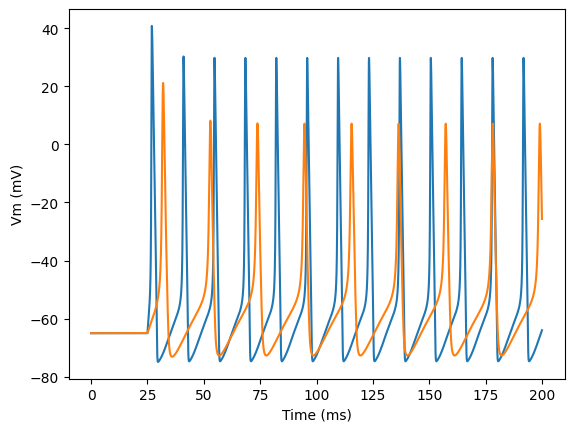

In [ ]:
Cm = 1
solution1 = eulersolve(Y,compute_derivatives,timespan,inp)
Cm = 5
solution2 = eulersolve(Y,compute_derivatives,timespan,inp)

Vs1 = solution1[:,0]
Vs2 = solution2[:,0]
plt.plot(timespan, Vs1)
plt.plot(timespan, Vs2)
plt.xlabel('Time (ms)')
plt.ylabel('Vm (mV)')


## Question 22 (Extra Credit)

What happens when the input keeps increasing at every time point? Check all the true statements.



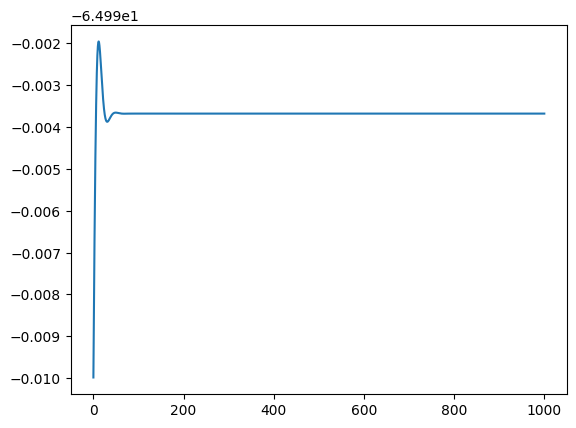

In [ ]:
# Start and end time (in milliseconds)
tmin = 0.0
tmax = 1000.0
timespan = np.arange(tmin,tmax,0.01)


# Initial state (Vm, n, m, h)
Y = np.array([-65, n_inf(-65), m_inf(-65), h_inf(-65)])

#Input current

inp = np.zeros(len(timespan))
# replace this with something that gives a steadily increasing input
# we have seen a numpy command that does this in one line

solution1 = eulersolve(Y,compute_derivatives,timespan,inp)


plt.plot(timespan, solution1[:,0])
